In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Exploratory data analysis

In [94]:
df=pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [96]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [100]:
df.shape

(150, 6)

In [102]:
duplicates = df.duplicated()
duplicates.sum()

0

In [105]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

_____________

**Changing the target column which is in categorical to numerical**

In [117]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()  
df['Species'] = LE.fit_transform(df['Species'])  
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [128]:
df.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,1.000000,0.716676,-0.397729,0.882747,0.899759,0.942830
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000,0.956464
Species,0.942830,0.782561,-0.419446,0.949043,0.956464,1.000000


____________________

**Dropping ID column**

In [58]:
df.drop('Id',axis=1,inplace=True)

In [60]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


__________

**Outliers Analysis**

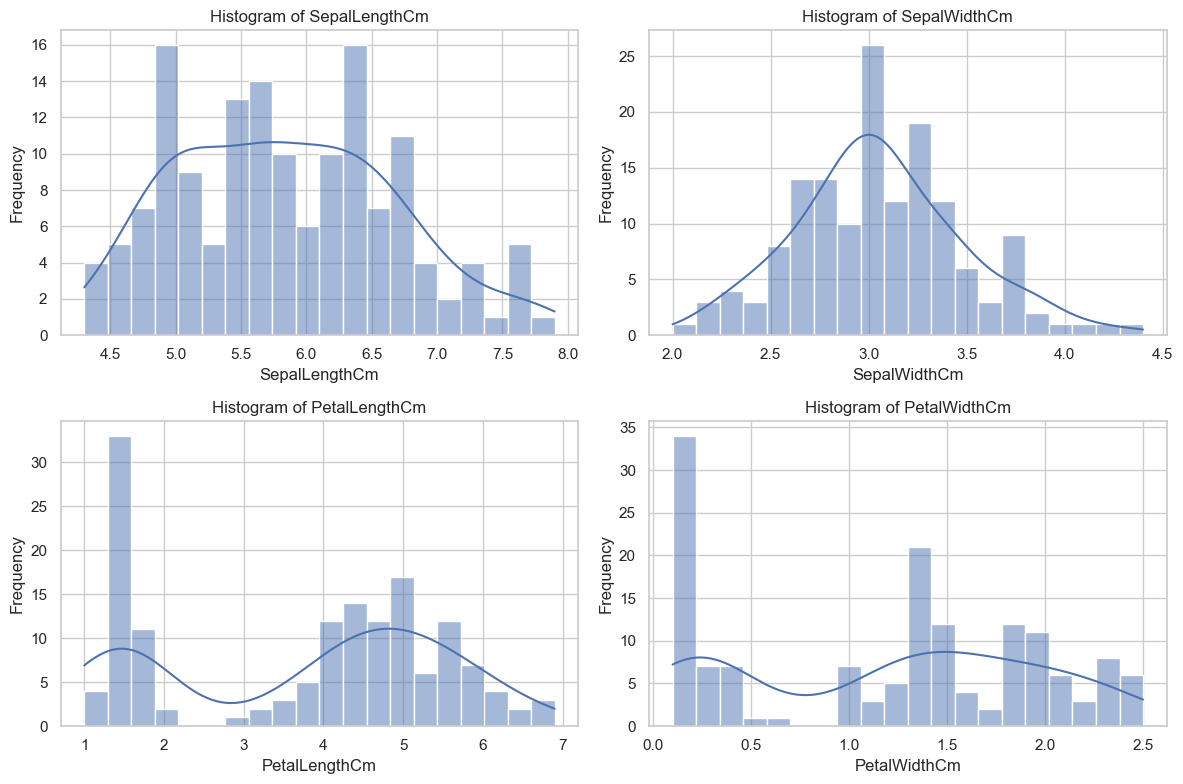

In [72]:
sns.set(style="whitegrid")
num_cols = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()  


for i, col in enumerate(num_cols):
    sns.histplot(data=df, x=col, kde=True, bins=20, ax=axes[i])
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')


plt.tight_layout()
plt.show()

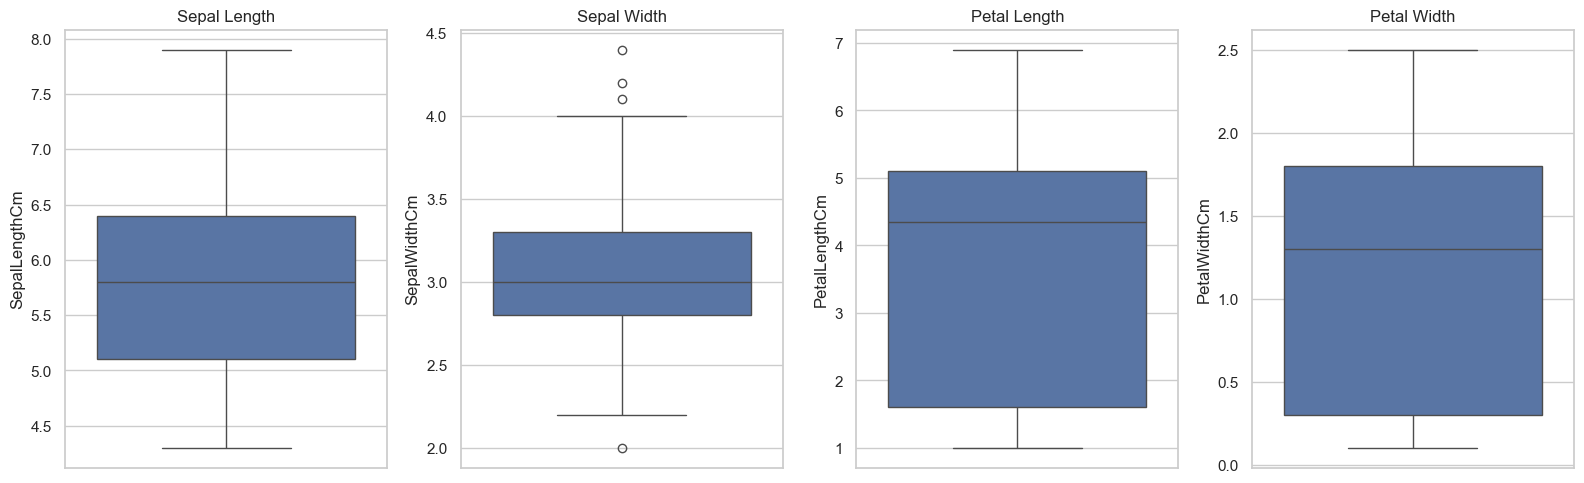

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 4, figsize=(16, 5))

sns.boxplot(data=df, y='SepalLengthCm', ax=axes[0])
axes[0].set_title('Sepal Length')

sns.boxplot(data=df, y='SepalWidthCm', ax=axes[1])
axes[1].set_title('Sepal Width')

sns.boxplot(data=df, y='PetalLengthCm', ax=axes[2])
axes[2].set_title('Petal Length')

sns.boxplot(data=df, y='PetalWidthCm', ax=axes[3])
axes[3].set_title('Petal Width')

plt.tight_layout()
plt.show()


in this dataset as we cann see sepal widht as some outliers, but the dataset is too small to remove the outliers, so I have decided to actually not remove the outliers but to cap them with the median

In [156]:
#this becomes outliers data frames with respect to other columns
Q1=np.percentile(df['SepalWidthCm'],25)
Q2=np.percentile(df['SepalWidthCm'],50)
Q3=np.percentile(df['SepalWidthCm'],75)
#calc IQR
IQR=Q3-Q1
#calc outliers
UB= Q3+1.5*IQR
LB= Q1-1.5*IQR
c1=df['SepalWidthCm']<LB
c2=df['SepalWidthCm']>UB
outliers=df[c1|c2]
outliers

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
15,16,5.7,4.4,1.5,0.4,0
32,33,5.2,4.1,1.5,0.1,0
33,34,5.5,4.2,1.4,0.2,0
60,61,5.0,2.0,3.5,1.0,1


In [165]:
med=df['SepalWidthCm'].median()
med

3.0

In [173]:
df['SepalWidthCm']=np.where(
    c1 | c2,         
    med,             
    df['SepalWidthCm']  
)

In [177]:
outliers

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species


<Axes: ylabel='SepalWidthCm'>

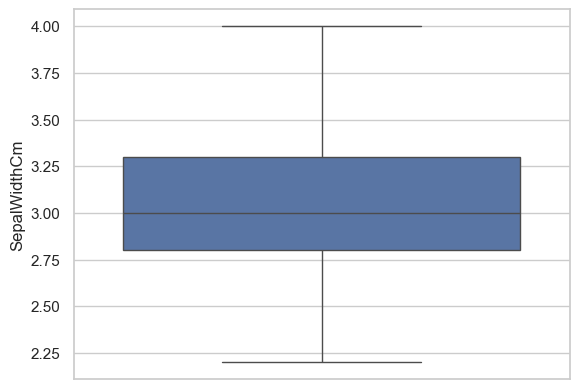

In [179]:
sns.boxplot(data=df,y='SepalWidthCm')

__________________

## Model Bulding

In [195]:
X=df.drop('Species',axis=1)
y=df['Species']

In [197]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1234)

In [207]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((120, 5), (30, 5), (120,), (30,))

In [221]:
from sklearn.ensemble import RandomForestClassifier
RC=RandomForestClassifier()

In [223]:
RC.fit(X_train,y_train)

RandomForestClassifier()

In [227]:
y_pred=RC.predict(X_test)

In [231]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Recall:", recall)
print("F1 Score:", f1)
print("Precision:", precision)



Accuracy: 1.0
Recall: 1.0
F1 Score: 1.0
Precision: 1.0
